# Using Actual vs Ideal Weight to Predict Gender

#### Using a data set of actual vs ideal weight, we'll look to classify the gender of new individuals using a Naive Bayes classifier.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.naive_bayes import GaussianNB

#### Read in, clean, and visualize the data to get an idea of what we're looking at.

In [2]:
# https://github.com/Thinkful-Ed/curric-data-001-data-sets/blob/master/ideal-weight/ideal_weight.csv
df = pd.read_csv('ideal_weight.csv', usecols=[1,2,3,4])
df.head()

,'sex','actual','ideal','diff'
0,'Male',215,190,25
1,'Female',155,135,20
2,'Male',195,155,40
3,'Female',145,130,15
4,'Female',110,100,10


In [3]:
df = df.rename(columns=lambda x: x.replace('\'',''))
df['sex'] = df['sex'].str.replace('\'','')
df['sex'] = df['sex'].astype('category')
df.head()

,sex,actual,ideal,diff
0,Male,215,190,25
1,Female,155,135,20
2,Male,195,155,40
3,Female,145,130,15
4,Female,110,100,10


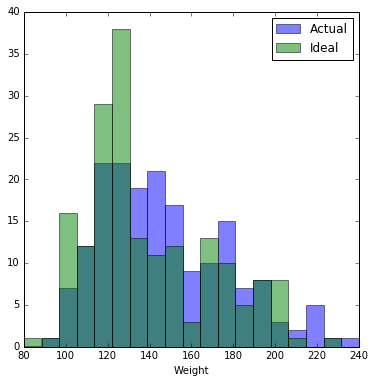

In [4]:
bins = numpy.linspace(80, 240, 20)

plt.figure(figsize=(6,6))
plt.hist(df['actual'], bins, alpha=0.5)
plt.hist(df['ideal'], bins, alpha=0.5)
plt.legend(['Actual','Ideal'])
plt.xlabel('Weight')

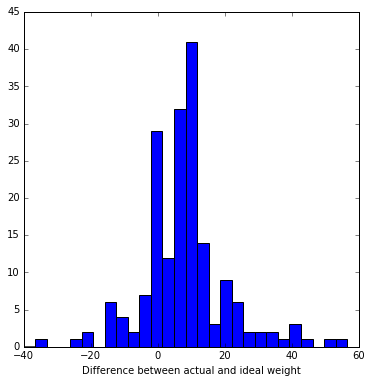

In [5]:
bins = numpy.linspace(-40, 60, 30)
plt.figure(figsize=(6,6))
plt.hist(df['diff'], bins)
plt.xlabel('Difference between actual and ideal weight');

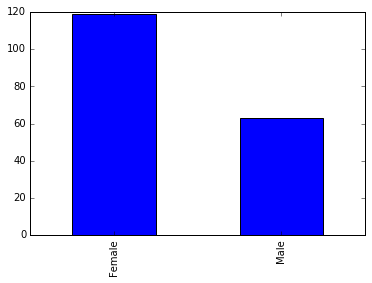

In [6]:
df.sex.value_counts().plot(kind='bar')

#### Define and fit the classifier, and measure its accuracy.

In [7]:
X = df[['actual','ideal','diff']]
y = df['sex']

gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
print('Number of mislabeled points out of a total %d points : %d' % \
       (len(X),(y != y_pred).sum()))

Number of mislabeled points out of a total 182 points : 14


#### Now introduce some new individuals. What does the classifier predict their gender to be?

In [8]:
print(gnb.predict([[250, 200, 50]]))

['Male']


In [9]:
print(gnb.predict([[140, 130, 10]]))

['Female']
